In [ ]:
import matplotlib.pyplot as plt
import ternary

def create_ternary_plot(values, labels):
    """
    Create a ternary plot based on the given values and labels.

    Args:
    - values: List of three proportions (A, B, C) that sum to 1.
    - labels: List of three labels corresponding to the proportions.
    """
    # Verify that the values sum to 1
    if sum(values) != 1:
        raise ValueError("The values should sum to 1")

    # Set up the ternary plot
    fig, tax = ternary.figure(scale=1.0)
    tax.boundary(linewidth=2.0)
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')  # Turn off the x and y axis
    tax.set_title("Ternary Plot", fontsize=20)

    # Set axis labels
    tax.left_axis_label(labels[0], fontsize=15)
    tax.right_axis_label(labels[1], fontsize=15)
    tax.bottom_axis_label(labels[2], fontsize=15)

    # Plot the point
    tax.scatter([values], marker='o', color='red', label="Data Point")

    # Display the values beneath the triangle
    value_str = "\n".join(f"{label} = {value:.2f}" for label, value in zip(labels, values))
    fig.text(0.5, -0.1, value_str, horizontalalignment='center', fontsize=15)

    # Show the plot
    tax.show()

# Example usage
values = [0.2, 0.3, 0.5]  # The proportions of A, B, and C
labels = ["A", "B", "C"]  # The labels for the three variables
create_ternary_plot(values, labels)


In [ ]:
def blend_colors(color1, color2, color3, frac1, frac2, frac3):
    """
    Blend three hex colors based on given fractions.

    Args:
    - color1, color2, color3: Hex color strings (e.g., "#FF0000" for red).
    - frac1, frac2, frac3: Fractions corresponding to each color.

    Returns:
    - Blended color as a hex string.
    """
    # Convert hex color to RGB tuple
    def hex_to_rgb(hex_color):
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    # Convert RGB tuple to hex color
    def rgb_to_hex(rgb_color):
        return '#{:02x}{:02x}{:02x}'.format(*rgb_color)

    # Get RGB values for each color
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    rgb3 = hex_to_rgb(color3)

    # Calculate blended RGB values
    blended_rgb = (
        int(frac1 * rgb1[0] + frac2 * rgb2[0] + frac3 * rgb3[0]),
        int(frac1 * rgb1[1] + frac2 * rgb2[1] + frac3 * rgb3[1]),
        int(frac1 * rgb1[2] + frac2 * rgb2[2] + frac3 * rgb3[2])
    )

    # Convert blended RGB values back to hex
    blended_hex = rgb_to_hex(blended_rgb)
    return blended_hex

# Example usage
color1 = "#FF0000"  # Red
color2 = "#00FF00"  # Green
color3 = "#0000FF"  # Blue
frac1 = 0.2
frac2 = 0.3
frac3 = 0.5

blended_color = blend_colors(color1, color2, color3, frac1, frac2, frac3)
print(blended_color)  # Output: Blended color as a hex string


In [ ]:
import matplotlib.pyplot as plt
import ternary
import numpy as np
from matplotlib.patches import Rectangle

def plot_ternary_trace(data, labels):
    """
    Create a ternary plot that traces the values from a list of tuples.

    Args:
    - data: List of tuples where each tuple represents a point in ternary space (A, B, C).
    - labels: List of three labels corresponding to the proportions.
    """
    # Verify the input data format
    if any(len(point) != 3 for point in data):
        raise ValueError("Each point should be a tuple of three values (A, B, C)")

    # Verify that each point sums to 1
    for point in data:
        if round(sum(point), 5) != 1:
            raise ValueError("Each point should sum to 1")

    # Set up the ternary plot
    fig, tax = ternary.figure(scale=1.0)
    tax.boundary(linewidth=2.0)
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')  # Turn off the x and y axis
    tax.set_title("Ternary Plot", fontsize=24)

    # Set axis labels
    # tax.left_axis_label(labels[0], fontsize=15)
    # tax.right_axis_label(labels[1], fontsize=15)
    # tax.bottom_axis_label(labels[2], fontsize=15)

    # Convert data to a list of tuples
    points = data

    # Plot the trace without dots at the junctions
    tax.plot(points, color='red', linestyle='-', linewidth=1.5)
    tax.scatter([points[-1]], marker='o', color='red', s=50)
    text = str(tuple(points[-1]))
    tax.annotate(text, points[-1], fontsize=8, xytext=(0, -10), textcoords='offset points', ha='center')    
    #fig.text(0.5, -0.1, "hello", horizontalalignment='center', fontsize=15)
    # Return the figure and tax to use it later
    return fig, tax

def plot_ternary_with_rectangle(data, labels):
    """
    Create a ternary plot that traces the values from a list of tuples and adds a colored rectangle
    beside it, representing ratios from the data.

    Args:
    - data: List of tuples where each tuple represents a point in ternary space (A, B, C).
    - labels: List of three labels corresponding to the proportions.
    """
    # Set up the figure with GridSpec
    #fig = plt.figure(figsize=(12, 12))
    gs = plt.GridSpec(1, 2, width_ratios=[18, 2])

    # Ternary plot
    fig, tax = plot_ternary_trace(data, labels)
    tax.ax.set_position(gs[0].get_position(fig))
    tax.ax.set_subplotspec(gs[0])

    # Calculate the ratios for the rectangle
    ratios = data[-1]  # Taking the last tuple in data for ratios
    colors = ['#ff0000', '#0000ff', '#00ff00']  # Define colors corresponding to A, B, C

    # Draw a rectangle for each ratio
    x = 0.86  # X position of the rectangle (adjust as needed)
    width = 0.14  # Width of the rectangle (adjust as needed)
    bottom = 0.5  # Starting position of the rectangle
    for i, ratio in enumerate(ratios):
        height = ratio * 0.45  # Scale the height for visualization
        rect = Rectangle((x, bottom), width, height, color=colors[i], alpha=0.7)
        fig.gca().add_patch(rect)

        text_x = x + width / 2
        text_y = bottom + height / 2

        if (ratio>=0.07):
            names=['Rock','Paper','Scissor']
            text = f"{names[i]}"
            #print(text)
            plt.text(text_x, text_y, text, ha='center', va='center', color='black', fontsize=8, fontweight='bold')

        bottom += height

    # Set limits and labels for the rectangle
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([1.03,-0.03])
    plt.yticks([-0.1])

    # Add legend for colors
    legend_labels = [f"{labels[i]}: {ratio:.2f}" for i, ratio in enumerate(ratios)]
    #plt.legend(legend_labels, loc='upper left', fontsize=10)

    # fig.text(0.45, 0, "Rock", horizontalalignment='center', fontsize=15,color='red')
    # fig.text(0.45, -0.04, "Paper", horizontalalignment='center', fontsize=15,color='green')
    # fig.text(0.45, -0.08, "Scissor", horizontalalignment='center', fontsize=15,color='blue')

    # Show the combined plot
    plt.tight_layout()
    plt.show()
s=0.3
# Example usage
data = [
    (0.2, 0.3, 0.5),
    (0.4, 0.2, 0.4),
    (0.3, 0.4, 0.3),
    (0.59, 0.01, 0.4)
]
labels = ["A", "B", "C"]  # The labels for the three variables

plot_ternary_with_rectangle(data, labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_centroid(points):
    """
    Calculate the centroid of a polygon given by the points.
    """
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    centroid_x = sum(x_coords) / len(points)
    centroid_y = sum(y_coords) / len(points)
    return (centroid_x, centroid_y)

def plot_radar_centroids(data, labels):
    """
    Create a radar chart and plot the centroids of the given data.

    Args:
    - data: List of tuples where each tuple represents a set of values for the variables.
    - labels: List of labels corresponding to the variables.
    """
    num_vars = len(labels)
    
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    centroids = []
    for d in data:
        # Close the loop for each set of points
        points = [(d[i] * np.cos(angles[i]), d[i] * np.sin(angles[i])) for i in range(num_vars)]
        points += [points[0]]
        centroid = calculate_centroid(points)
        centroids.append(centroid)
    
    # Convert centroids to polar coordinates
    polar_centroids = [(np.arctan2(c[1], c[0]), np.sqrt(c[0]**2 + c[1]**2)) for c in centroids]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw one axe per variable and add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Plot lines connecting the centroids
    centroid_angles, centroid_radii = zip(*polar_centroids)
    ax.plot(centroid_angles, centroid_radii, color='black', linestyle='-', linewidth=1.5)
    
    # Plot the last centroid with a big dot
    ax.scatter([centroid_angles[-1]], [centroid_radii[-1]], color='red', s=100, zorder=3)
    
    # Show the plot
    plt.show()


# Example usage
data = [
    (0.2, 0.3, 0.5, 0.7, 0.6),
    (0.4, 0.2, 0.4, 0.5, 0.3),
    (0.3, 0.4, 0.3, 0.2, 0.8),
    (0.1, 0.1, 0.8, 0.3, 0.4)
]
labels = ["A", "B", "C", "D", "E"]  # The labels for the five variables

plot_radar_centroids(data, labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_radar_chart(data, labels):
    # Number of variables
    num_vars = len(labels)
    
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot is made in a circular (360 degrees) space, so we need to "complete the loop"
    data += data[:1]
    angles += angles[:1]
    
    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw the outer circle with a radius of 1
    ax.set_ylim(0, 1)
    ax.set_yticks([])  # Remove the inner y-ticks
    
    # Plot data
    ax.plot(angles, data, linewidth=2, linestyle='solid')
    ax.fill(angles, data, 'b', alpha=0.25)
    
    # Draw one label per variable and set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Remove the inner circles
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Only show the outermost circle
    ax.spines['polar'].set_visible(True)
    
    plt.show()

# Example usage
data = [0.4, 0, 0, 0, 0.6]  # Example data points
labels = ['A', 'B', 'C', 'D', 'E']  # Labels for each axis

create_radar_chart(data, labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_colored_radar_chart(data, labels):
    # Ensure the sum of data is 1
    if sum(data) != 1:
        data = [float(i)/sum(data) for i in data]
    
    # Number of variables
    num_vars = len(labels)
    
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot is made in a circular (360 degrees) space, so we need to "complete the loop"
    data += data[:1]
    angles += angles[:1]
    
    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(polar=True))
    
    # Plot data
    ax.plot(angles, data, linewidth=2, linestyle='solid')
    ax.fill(angles, data, 'b', alpha=0.25)
    
    # Draw one label per variable and set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Remove the inner circles
    ax.set_ylim(0, 1)
    ax.set_yticks([])  # Remove the inner y-ticks
    
    # Only show the outermost circle
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.spines['polar'].set_visible(True)
    
    # Adding the rectangle beside the radar chart
    ax_rect = fig.add_axes([0.75, 0.2, 0.1, 0.6])  # [left, bottom, width, height]
    
    # Color the rectangle based on data values
    colors = plt.cm.viridis(np.linspace(0, 1, num_vars))
    bottom = 0
    
    for i, fraction in enumerate(data[:-1]):
        height = fraction
        ax_rect.add_patch(plt.Rectangle((0, bottom), 1, height, color=colors[i]))
        bottom += height
    
    ax_rect.set_xlim(0, 1)
    ax_rect.set_ylim(0, 1)
    ax_rect.set_xticks([])
    ax_rect.set_yticks([])
    
    plt.show()

import random
def generate_random_tuples(length,size):
    data = []
    for _ in range(length):
        x=[0 for _ in range(size)]

        for i in range(size-1):
            x[i]=random.uniform(0,1-sum(x[:i]))
        
        x[-1] = 1 - sum(x)
        random.shuffle(x)
        data.append(x)
    return data

data=generate_random_tuples(1,6)
print(data[0])

# Example usage
#data = [0.1, 0.3, 0.2, 0.15, 0.25]  # Example data points, sum is 1
labels = ['A', 'B', 'C', 'D', 'E','F']  # Labels for each axis

create_colored_radar_chart(data[0], labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_ngon(n, values_list, labels):
    assert len(values_list) > 0, "At least one set of values must be provided"
    assert all(len(values) == n for values in values_list), f"All value sets must have length {n}"
    assert len(labels) == n, "The number of labels must be equal to n"

    # Generate the vertices of the regular n-gon
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = np.c_[np.cos(angles), np.sin(angles)]

    # Plot the n-gon
    fig, ax = plt.subplots()
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor='r', linewidth=2.5)  # Red color for edges, thicker border
    ax.add_patch(polygon)

    # Initialize variables for drawing lines
    center = np.mean(vertices, axis=0)  # Center of the n-gon
    prev_point = None  # To track the previous point for drawing lines

    # Plot each set of values
    for values in values_list:
        # Calculate the coordinates of the point based on the values
        point = np.dot(values, vertices)

        # Draw straight lines from previous point to current point
        if prev_point is not None:
            ax.plot([prev_point[0], point[0]], [prev_point[1], point[1]], 'k-')

        # Update previous point
        prev_point = point

    # Plot a smaller dot at the last point
    ax.plot(prev_point[0], prev_point[1], 'ko', markersize=4)

    # Annotate the vertices with labels
    label_offset = 0.05  # Offset factor for label positions
    for i, vertex in enumerate(vertices):
        alignment = 'right' if vertex[0] < 0 else 'left'
        vertical_alignment = 'top' if vertex[1] < 0 else 'bottom'
        offset_x = label_offset if vertex[0] >= 0 else -label_offset
        offset_y = label_offset if vertex[1] >= 0 else -label_offset
        ax.text(vertex[0] + offset_x, vertex[1] + offset_y, f'{labels[i]}', fontsize=10, ha=alignment, va=vertical_alignment)

    # Hide axes and grid
    ax.axis('off')

    # Setting the aspect ratio to be equal
    ax.set_aspect('equal')
    plt.show()
    
import random
def generate_random_tuples(length,size):
    data = []
    for _ in range(length):
        x=[0 for _ in range(size)]

        for i in range(size-1):
            x[i]=random.uniform(0,1-sum(x[:i]))
        
        x[-1] = 1 - sum(x)
        random.shuffle(x)
        data.append(x)
    return data



# Example usage
n = 10  # Number of sides
data=generate_random_tuples(5,n)
print(data[-1])
#values = (0.2, 0.2, 0.2, 0.2, 0.2)  # Tuple of values summing to 1
capital_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']
temp=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']

for _ in range(n//26):
    for cap in temp:
        capital_alphabets.append(cap)

labels = capital_alphabets[:n]  # Labels for the vertices
draw_ngon(n,data, labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_ngon(n, values_list, labels):
    def rgb_to_hex(rgb):
        """Converts an RGB tuple to a hexadecimal color code."""
        return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])
    def generate_rgb_colors(n):
        # Define endpoints of RGB scale
        start_color = np.array([0, 0, 255])  # Blue (RGB: 0, 0, 255)
        end_color = np.array([255, 0, 0])   # Red (RGB: 255, 0, 0)

        # Generate equally spaced colors
        colors = []
        for i in range(n):
            # Linear interpolation between start_color and end_color
            color = tuple(np.round(start_color + (end_color - start_color) * (i / (n - 1))).astype(int))
            colors.append(color)

        return colors

    assert len(values_list) > 0, "At least one set of values must be provided"
    assert all(len(values) == n for values in values_list), f"All value sets must have length {n}"
    assert len(labels) == n, "The number of labels must be equal to n"

    # Generate the vertices of the regular n-gon
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = np.c_[np.cos(angles), np.sin(angles)]

    # Plot the n-gon
    fig, ax = plt.subplots(figsize=(5.2, 5.1))  # Adjust figure size as needed
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor='r', linewidth=2.5)  # Red color for edges, thicker border
    ax.add_patch(polygon)

    # Initialize variables for drawing lines
    center = np.mean(vertices, axis=0)  # Center of the n-gon
    prev_point = None  # To track the previous point for drawing lines

    # Plot each set of values
    for values in values_list:
        # Calculate the coordinates of the point based on the values
        point = np.dot(values, vertices)

        # Draw straight lines from previous point to current point
        if prev_point is not None:
            ax.plot([prev_point[0], point[0]], [prev_point[1], point[1]], 'k-')

        # Update previous point
        prev_point = point

    # Plot a smaller dot at the last point
    ax.plot(prev_point[0], prev_point[1], 'ko', markersize=4)

    # Annotate the vertices with labels
    label_offset = 0.05  # Offset factor for label positions
    for i, vertex in enumerate(vertices):
        alignment = 'right' if vertex[0] < 0 else 'left'
        vertical_alignment = 'top' if vertex[1] < 0 else 'bottom'
        offset_x = label_offset if vertex[0] >= 0 else -label_offset
        offset_y = label_offset if vertex[1] >= 0 else -label_offset
        ax.text(vertex[0] + offset_x, vertex[1] + offset_y, f'{labels[i]}', fontsize=10, ha=alignment, va=vertical_alignment)

    # Hide axes and grid for the n-gon plot
    ax.axis('off')

    # Calculate partition sizes for the rectangle based on the last values plot
    last_values = values_list[-1]
    partition_sizes = [value * 8 for value in last_values]  # Scale values for the rectangle

    # Plot the rectangle with colored partitions and labels
    ax2 = fig.add_axes([1.1, 0.1, 0.15, 0.75])  # Rectangle position and size
    colors = generate_rgb_colors_hex(n)  # Define colors for partitions manually
    y_position = 0.1  # Initial y-position for the bottom of the partitions
    for i, size in enumerate(partition_sizes):
        ax2.add_patch(plt.Rectangle((0, y_position), 1, size, color=colors[i], alpha=0.7))
        ax2.text(0.5, y_position + size / 2, f'{labels[i]}', fontsize=10, ha='center', va='center', color='black')
        y_position += size

    # Set limits and hide axes for the rectangle plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 8)
    ax2.axis('off')

    # Show the plot
    plt.show()


# Example usage
n = 5  # Number of sides
data=generate_random_tuples(5,n)
print(data[-1])
#values = (0.2, 0.2, 0.2, 0.2, 0.2)  # Tuple of values summing to 1
capital_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']
temp=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']

for _ in range(n//26):
    for cap in temp:
        capital_alphabets.append(cap)

labels = capital_alphabets[:n]  # Labels for the vertices
draw_ngon(n,data, labels)

# # Example usage with multiple values
# n = 5  # Number of sides
# values_list = [
#     (0.2, 0.2, 0.2, 0.2, 0.2),
#     (0.1, 0.3, 0.2, 0.15, 0.25),
#     (0.3, 0.1, 0.1, 0.25, 0.25)
# ]
# labels = ["A", "B", "C", "D", "E"]  # Labels for the vertices
# draw_ngon(n, values_list, labels)


In [ ]:
def hex_to_rgb(hex_colors):
    rgb_colors = []
    for hex_color in hex_colors:
        # Strip the '#' symbol if present
        hex_color = hex_color.lstrip('#')
        
        # Convert to RGB tuple
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        rgb_colors.append(rgb)
    
    return rgb_colors

def weighted_average_color(hex_colors, fractions):
    # Convert hex colors to RGB tuples
    rgb_colors = hex_to_rgb(hex_colors)
    
    # Calculate weighted average RGB value
    weighted_rgb = [int(sum(f * c[i] for f, c in zip(fractions, rgb_colors))) for i in range(3)]
    
    # Ensure RGB values are within range [0, 255]
    weighted_rgb = [max(0, min(255, val)) for val in weighted_rgb]
    
    # Convert weighted RGB tuple back to hex color
    weighted_hex = '#{:02X}{:02X}{:02X}'.format(*weighted_rgb)
    
    return weighted_hex

# Example usage
hex_colors = ['#FF0000', '#00FF00', '#0000FF']  # Example hex color values
fractions = [0.2, 0.2, 0.6]  # Example fractions, sum is 1

weighted_hex = weighted_average_color(hex_colors, fractions)
print("Weighted Average Color Hex:", weighted_hex)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def invert_hex(hex_color):
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    inverted_rgb = tuple(255 - value for value in rgb)
    inverted_hex = '#{:02x}{:02x}{:02x}'.format(*inverted_rgb)
    return inverted_hex

def hex_to_rgb(hex_colors):
    rgb_colors = []
    for hex_color in hex_colors:
        # Strip the '#' symbol if present
        hex_color = hex_color.lstrip('#')
        
        # Convert to RGB tuple
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        rgb_colors.append(rgb)
    
    return rgb_colors

def weighted_average_color(hex_colors, fractions):
    # Convert hex colors to RGB tuples
    rgb_colors = hex_to_rgb(hex_colors)
    
    # Calculate weighted average RGB value
    weighted_rgb = [int(sum(f * c[i] for f, c in zip(fractions, rgb_colors))) for i in range(3)]
    
    # Ensure RGB values are within range [0, 255]
    weighted_rgb = [max(0, min(255, val)) for val in weighted_rgb]
    
    # Convert weighted RGB tuple back to hex color
    weighted_hex = '#{:02X}{:02X}{:02X}'.format(*weighted_rgb)
    
    return weighted_hex

def rgb_to_hex(rgb):
    """Converts an RGB tuple to a hexadecimal color code."""
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def generate_rgb_colors(n):
    # Define endpoints of RGB scale
    start_color = np.array([0, 0, 255])  # Blue (RGB: 0, 0, 255)
    end_color = np.array([255, 0, 0])   # Red (RGB: 255, 0, 0)

    # Generate equally spaced colors
    colors = []
    for i in range(n):
        # Linear interpolation between start_color and end_color
        color = tuple(np.round(start_color + (end_color - start_color) * (i / (n - 1))).astype(int))
        colors.append(color)

    return colors

def draw_ngon(n, values_list, labels):

    assert len(values_list) > 0, "At least one set of values must be provided"
    assert all(len(values) == n for values in values_list), f"All value sets must have length {n}"
    assert len(labels) == n, "The number of labels must be equal to n"

    # Generate the vertices of the regular n-gon
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = np.c_[np.cos(angles), np.sin(angles)]

    # Plot the n-gon
    fig, ax = plt.subplots(figsize=(5.2, 5.1))  # Adjust figure size as needed
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor=invert_hex('#777777'), linewidth=2.5)  # Red color for edges, thicker border
    ax.add_patch(polygon)

    # Initialize variables for drawing lines
    center = np.mean(vertices, axis=0)  # Center of the n-gon
    prev_point = None  # To track the previous point for drawing lines

    # Plot each set of values
    for values in values_list:
        # Calculate the coordinates of the point based on the values
        point = np.dot(values, vertices)

        # Draw straight lines from previous point to current point
        if prev_point is not None:
            ax.plot([prev_point[0], point[0]], [prev_point[1], point[1]], 'k-')

        # Update previous point
        prev_point = point

    colors = generate_rgb_colors(n)  # Define colors for partitions manually

    for i in range(len(colors)):
        colors[i]=rgb_to_hex(colors[i])
        colors[i]=invert_hex(colors[i])

    dot_color=weighted_average_color(colors,values_list[-1])
    #dot_color=invert_hex(dot_color)

    # Plot a smaller dot at the last point
    ax.plot(prev_point[0], prev_point[1], 'o', markersize=4,color=dot_color)

    # Annotate the vertices with labels
    label_offset = 0.05  # Offset factor for label positions
    for i, vertex in enumerate(vertices):
        alignment = 'right' if vertex[0] < 0 else 'left'
        vertical_alignment = 'top' if vertex[1] < 0 else 'bottom'
        offset_x = label_offset if vertex[0] >= 0 else -label_offset
        offset_y = label_offset if vertex[1] >= 0 else -label_offset
        ax.text(vertex[0] + offset_x, vertex[1] + offset_y, f'{labels[i]}', fontsize=10, ha=alignment, va=vertical_alignment)

    # Hide axes and grid for the n-gon plot
    ax.axis('off')

    # Calculate partition sizes for the rectangle based on the last values plot
    last_values = values_list[-1]
    partition_sizes = [value * 8 for value in last_values]  # Scale values for the rectangle

    # Plot the rectangle with colored partitions and labels
    ax2 = fig.add_axes([1.1, 0.1, 0.15, 0.75])  # Rectangle position and size

    rect_label=copy.deepcopy(labels)

    label_thresh=0.06
    for i in range(len(labels)):
        if last_values[i]<label_thresh:
            rect_label[i]=""

    y_position = 0.1  # Initial y-position for the bottom of the partitions
    for i, size in enumerate(partition_sizes):
        ax2.add_patch(plt.Rectangle((0, y_position), 1, size, color=colors[i], alpha=0.7))
        ax2.text(0.5, y_position + size / 2, f'{rect_label[i]}', fontsize=10, ha='center', va='center', color='black')
        y_position += size

    # Set limits and hide axes for the rectangle plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 8)
    ax2.axis('off')

    # Add a bold title at the top of the figure
    fig.suptitle("Evolution Plot", fontsize=19, fontweight='bold',x=0.65)

    # Show the plot
    plt.show()



# Example usage
n = 7  # Number of sides
data=generate_random_tuples(5,n)
#s=0.015
#data.append([s,1-s,0])
#data.append([1-s]+[0 for _ in range(n-2)]+[s])
#data.append([0.2,0.002,0.3,0.1,0.002,0.615,0.002])
print(data[-1])
#values = (0.2, 0.2, 0.2, 0.2, 0.2)  # Tuple of values summing to 1
capital_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']
temp=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']

for _ in range(n//26):
    for cap in temp:
        capital_alphabets.append(cap)

labels = capital_alphabets[:n]  # Labels for the vertices
#labels = ["Rock", "Paper", "Scissor"]
draw_ngon(n,data, labels)

In [ ]:
import numpy as np

def rgb_to_hex(rgb):
    """Converts an RGB tuple to a hexadecimal color code."""
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def generate_rgb_colors_hex(n):
    """Generates n equally spaced colors from blue to red and returns them as hex codes."""
    # Define endpoints of RGB scale
    start_color = np.array([0, 0, 255])  # Blue (RGB: 0, 0, 255)
    end_color = np.array([255, 0, 0])   # Red (RGB: 255, 0, 0)

    # Generate equally spaced colors
    colors = []
    for i in range(n):
        # Linear interpolation between start_color and end_color
        color = tuple(np.round(start_color + (end_color - start_color) * (i / (n - 1))).astype(int))
        hex_code = rgb_to_hex(color)
        colors.append(hex_code)

    return colors

# Example usage
n = 10  # Number of colors
colors_hex = generate_rgb_colors_hex(n)
print(colors_hex)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar(data, labels):
    """
    Create a radar chart for the given data.

    Args:
    - data: List of tuples where each tuple represents a set of values for the variables.
    - labels: List of labels corresponding to the variables.
    """
    num_vars = len(labels)
    data.append([1,1,1,1,1,1])
    
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The radar chart is a circular plot, so we need to close the circle
    data = np.array(data)
    data = np.concatenate((data, data[:, [0]]), axis=1)
    angles += angles[:1]
    print(angles)
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, data[-1], color='red', linewidth=0)
    data=data[:-1]

    for d in data:
        ax.fill(angles, d, color='red', alpha=0.25)
        ax.plot(angles, d, color='red', linewidth=2)
    
    # Draw one axe per variable and add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Show the plot
    plt.show()


import random
def generate_random_tuples(length,size):
    data = []
    for _ in range(length):
        x=[0 for _ in range(size)]

        for i in range(size-1):
            x[i]=random.uniform(0,1-sum(x[:i]))
        
        x[-1] = 1 - sum(x)
        random.shuffle(x)
        data.append(x)
    return data

data=generate_random_tuples(0,6)
data.append([0.5,0.5,0,0,0,0])
#data.append([1,1,1,1,1,1])
# Example usage
# data = [
#     (0.2, 0.3, 0.5, 0.7, 0.6),
#     (0.4, 0.2, 0.4, 0.5, 0.3),
#     (0.3, 0.4, 0.3, 0.2, 0.8),
#     (0.1, 0.1, 0.8, 0.3, 0.4)
# ]

labels = ["A", "B", "C", "D", "E","F"]  # The labels for the five variables

plot_radar(data, labels)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ngon(data):
    """
    Plot an n-gon where n is the length of data.

    Args:
    - data: List of values representing proportions that sum up to 1.
    """
    n = len(data)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
    data += data[:1]  # Close the polygon
    angles += angles[:1]  # Close the polygon

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(angles, data, marker='o', linestyle='-', color='b', linewidth=2)
    ax.fill(angles, data, color='b', alpha=0.3)

    ax.set_ylim(0, 1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f'Point {i+1}' for i in range(n)])
    ax.set_title(f'{n}-gon Plot', fontsize=16)
    ax.set_xlabel('Points')
    ax.set_ylabel('Values')

    plt.show()

data=generate_random_tuples(3,6)
#data.append([1,1,1,1,1,1])
# Example usage
# data = [
#     (0.2, 0.3, 0.5, 0.7, 0.6),
#     (0.4, 0.2, 0.4, 0.5, 0.3),
#     (0.3, 0.4, 0.3, 0.2, 0.8),
#     (0.1, 0.1, 0.8, 0.3, 0.4)
# ]

labels = ["A", "B", "C", "D", "E","F"]  # The labels for the five variables

plot_ngon(data[0])

In [ ]:
import matplotlib.pyplot as plt
import ternary
import time
import random
import os
import cv2
from tqdm import tqdm

org_path= 'G:/Projects/Python/Evolution_Simulation/'

frames_path = org_path+'tax_frames'
video_path = org_path+'tax_plots.mp4'

def plot_specific(data, labels):
    """
    Create a ternary plot that traces the values from a list of tuples.

    Args:
    - data: List of tuples where each tuple represents a point in ternary space (A, B, C).
    - labels: List of three labels corresponding to the proportions.
    """

    def invert_hex(hex_color):
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        inverted_rgb = tuple(255 - value for value in rgb)
        inverted_hex = '#{:02x}{:02x}{:02x}'.format(*inverted_rgb)
        return inverted_hex

    # Verify the input data format
    if any(len(point) != 3 for point in data):
        raise ValueError("Each point should be a tuple of three values (A, B, C)")

    # Verify that each point sums to 1
    for point in data:
        if round(sum(point), 5) != 1:
            raise ValueError("Each point should sum to 1")

    # Set up the ternary plot
    fig, tax = ternary.figure(scale=1.0)
    #tax.set_background_color(color="black", alpha=0.7) # the detault, essentially
    #fig.set_facecolor('black')
    #tax.boundary(linewidth=2.0)
    tax.boundary(linewidth=2.0, axes_colors={'l':invert_hex('#ff0000'),'r':invert_hex('#0000ff'),'b':invert_hex('#00ff00')})
    tax.clear_matplotlib_ticks()
    #tax.get_axes().patch.set_facecolor('red')
    tax.get_axes().axis('off')  # Turn off the x and y axis
    tax.set_title("Ternary Plot", fontsize=24,fontweight='bold')


    # Set axis labels
    tax.left_axis_label(labels[0], fontsize=15, color=invert_hex('#ff0000'))
    tax.right_axis_label(labels[1], fontsize=15, color=invert_hex('#0000ff'))
    tax.bottom_axis_label(labels[2], fontsize=15, color=invert_hex('#00ff00'))

    # Convert data to a list of tuples
    points = data

    # Plot the trace without dots at the junctions
    tax.plot(points, color='black', linestyle='-', linewidth=1)

    frame_number=len(data)-2

    frame_filename = f"{frames_path}/frame_{frame_number:03d}.png"
    plt.savefig(frame_filename, bbox_inches='tight')
    plt.close()

    # Show the plot
    #tax.show()

def plot_frames(data,labels):
    for i in tqdm(range(2,len(data)+1)):
        plot_specific(data[:i],labels)

def generate_video(data,labels,fps=30):

    def inverse_image(im):
        return (255-im)

    plot_frames(data,labels)

    # Get the list of frames
    frame_files = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')])
    frame_files=frame_files[:len(data)-1]
    img_path = os.path.join(frames_path, frame_files[0])
    img = cv2.imread(img_path)

    height, width, _ = img.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # for MP4
    out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

    # Write all frames to the video
    for file in frame_files:
        img_path = os.path.join(frames_path, file)
        frame = cv2.imread(img_path)
        frame=inverse_image(frame)
        out.write(frame)

    # Release the VideoWriter
    out.release()
    print(f"Video successfully created at {video_path}")

def generate_random_tuples(length):
    data = []
    for _ in range(length):
        # Generate three random numbers
        x = random.uniform(0, 1)
        y = random.uniform(0, 1 - x)
        z = 1 - x - y
        data.append([x, y, z])
    return data

data=generate_random_tuples(100)

labels = ["A", "B", "C"]  # The labels for the three variables
generate_video(data, labels,fps=20)


In [ ]:

import matplotlib.animation as animation  
import matplotlib.pyplot as plt  
import numpy as np  
  
   
# creating a blank window 
# for the animation  
fig = plt.figure()  
axis = plt.axes(xlim =(-50, 50), 
                ylim =(-50, 50))  
  
line, = axis.plot([], [], lw = 2)  
   
# what will our line dataset 
# contain? 
def init():  
    line.set_data([], [])  
    return line,  
   
# initializing empty values 
# for x and y co-ordinates 
xdata, ydata = [], []  
   
# animation function  
def animate(i):  
    # t is a parameter which varies 
    # with the frame number 
    t = 0.1 * i  
       
    # x, y values to be plotted  
    x = t * np.sin(t)  
    y = t * np.cos(t)  
       
    # appending values to the previously  
    # empty x and y data holders  
    xdata.append(x)  
    ydata.append(y)  
    line.set_data(xdata, ydata)  
      
    return line, 
   
# calling the animation function      
anim = animation.FuncAnimation(fig, animate, init_func = init,  
                               frames = 500, interval = 20, blit = True)  
   
# saves the animation in our desktop 
anim.save('growingCoil.gif', writer = 'ffmpeg', fps = 30) 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Example function to create and save an animated plot as a GIF
def animate_example():
    # Create figure and axis
    fig, ax = plt.subplots()
    
    # Set up the plot limits
    ax.set_xlim(0, 2 * np.pi)
    ax.set_ylim(-1.5, 1.5)
    
    # Initialize an empty line
    line, = ax.plot([], [], lw=2)
    
    # Initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,
    
    # Animation function: this is called sequentially
    def update(frame):
        x = np.linspace(0, 2 * np.pi, 1000)
        y = np.sin(x + frame / 10.0)
        line.set_data(x, y)
        return line,
    
    # Create the animation object
    ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True)
    
    # Save the animation as a GIF
    ani.save('sine_wave_animation.gif', writer=PillowWriter(fps=20))
    
    # Show the animation
    plt.show()

# Call the function to create and save the animation
animate_example()


In [ ]:
import numpy as np

def generate_random_ternary_data(num_points=10):
    data = np.random.dirichlet(np.ones(3), size=num_points)
    return data

# Generate multiple sets of ternary data
data_list = [generate_random_ternary_data() for _ in range(5)]

import ternary
import matplotlib.pyplot as plt
import os

# Path to save the frames
frames_path = 'G:/Projects/Python/Evolution_Simulation/frames'
os.makedirs(frames_path, exist_ok=True)

for i, data in enumerate(data_list):
    figure, tax = ternary.figure(scale=1)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue")

    # Plot your data
    tax.scatter(data, marker='o', color='red', label="Data Points")

    tax.legend()
    tax.set_title(f"Frame {i+1}")
    
    # Save the frame
    frame_filename = f"{frames_path}/frame_{i:03d}.png"
    plt.savefig(frame_filename)
    plt.close()




In [ ]:

import imageio
import cv2

fps=1
# Path to save the GIF
video_path = 'G:/Projects/Python/Evolution_Simulation/plots.mp4'

# Get the list of frames
frame_files = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')])
img_path = os.path.join(frames_path, frame_files[0])
img = cv2.imread(img_path)

height, width, _ = img.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # for MP4
out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

# Write all frames to the video
for file in frame_files:
    img_path = os.path.join(frames_path, file)
    frame = cv2.imread(img_path)
    out.write(frame)

# Release the VideoWriter
out.release()
print(f"Video successfully created at {video_path}")

In [ ]:

import imageio

# Path to save the GIF
gif_path = 'G:/Projects/Python/Evolution_Simulation/plots.gif'

# Get the list of frames
frame_files = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')])

# Read and compile frames into a GIF
with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
    for frame_file in frame_files:
        frame_path = os.path.join(frames_path, frame_file)
        image = imageio.imread(frame_path)
        writer.append_data(image)

print(f"GIF created and saved at {gif_path}")

[0.012100207650918016, 0.0837873239223651, 0.6977956980169971, 0.20260364531998215, 0.0037131250897376165]


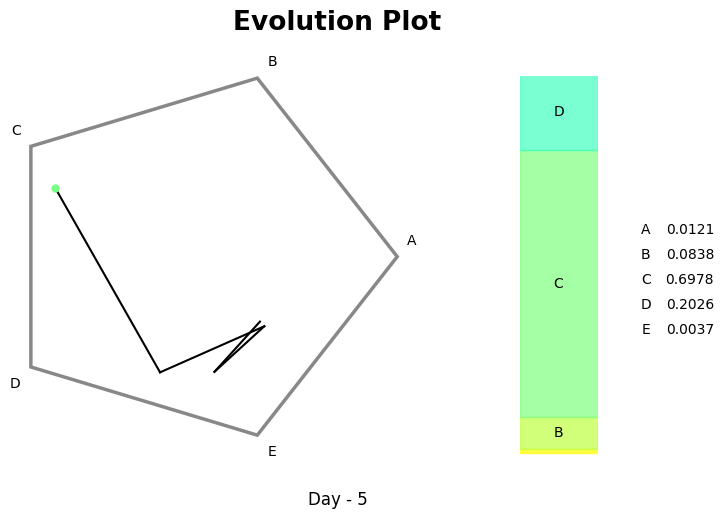

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import os

def invert_hex(hex_color):
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    inverted_rgb = tuple(255 - value for value in rgb)
    inverted_hex = '#{:02x}{:02x}{:02x}'.format(*inverted_rgb)
    return inverted_hex

def hex_to_rgb(hex_colors):
    rgb_colors = []
    for hex_color in hex_colors:
        # Strip the '#' symbol if present
        hex_color = hex_color.lstrip('#')
        
        # Convert to RGB tuple
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        rgb_colors.append(rgb)
    
    return rgb_colors

import random
def generate_random_tuples(length,size):
    data = []
    for _ in range(length):
        x=[0 for _ in range(size)]

        for i in range(size-1):
            x[i]=random.uniform(0,1-sum(x[:i]))
        
        x[-1] = 1 - sum(x)
        random.shuffle(x)
        data.append(x)
    return data

def weighted_average_color(hex_colors, fractions):
    # Convert hex colors to RGB tuples
    rgb_colors = hex_to_rgb(hex_colors)
    
    # Calculate weighted average RGB value
    weighted_rgb = [int(sum(f * c[i] for f, c in zip(fractions, rgb_colors))) for i in range(3)]
    
    # Ensure RGB values are within range [0, 255]
    weighted_rgb = [max(0, min(255, val)) for val in weighted_rgb]
    
    # Convert weighted RGB tuple back to hex color
    weighted_hex = '#{:02X}{:02X}{:02X}'.format(*weighted_rgb)
    
    return weighted_hex

def rgb_to_hex(rgb):
    """Converts an RGB tuple to a hexadecimal color code."""
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def generate_rgb_colors(n):
    # Define endpoints of RGB scale
    start_color = np.array([0, 0, 255])  # Blue (RGB: 0, 0, 255)
    end_color = np.array([255, 0, 0])   # Red (RGB: 255, 0, 0)

    # Generate equally spaced colors
    colors = []
    for i in range(n):
        # Linear interpolation between start_color and end_color
        color = tuple(np.round(start_color + (end_color - start_color) * (i / (n - 1))).astype(int))
        colors.append(color)

    return colors

def draw_ngon(data, labels,max_plots):

    values_list=data[-max_plots:]

    n=len(data[0])

    assert len(values_list) > 0, "At least one set of values must be provided"
    assert all(len(values) == n for values in values_list), f"All value sets must have length {n}"
    assert len(labels) == n, "The number of labels must be equal to n"

    # Generate the vertices of the regular n-gon
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = np.c_[np.cos(angles), np.sin(angles)]

    # Plot the n-gon
    fig, ax = plt.subplots(figsize=(5.2, 5.1))  # Adjust figure size as needed
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor=invert_hex('#777777'), linewidth=2.5)  # Red color for edges, thicker border
    ax.add_patch(polygon)

    # Initialize variables for drawing lines
    center = np.mean(vertices, axis=0)  # Center of the n-gon
    prev_point = None  # To track the previous point for drawing lines

    # Plot each set of values
    for values in values_list:
        # Calculate the coordinates of the point based on the values
        point = np.dot(values, vertices)

        # Draw straight lines from previous point to current point
        if prev_point is not None:
            ax.plot([prev_point[0], point[0]], [prev_point[1], point[1]], 'k-')

        # Update previous point
        prev_point = point

    colors = generate_rgb_colors(n)  # Define colors for partitions manually

    for i in range(len(colors)):
        colors[i]=rgb_to_hex(colors[i])
        colors[i]=invert_hex(colors[i])

    dot_color=weighted_average_color(colors,values_list[-1])
    #dot_color=invert_hex(dot_color)

    # Plot a smaller dot at the last point
    ax.plot(prev_point[0], prev_point[1], 'o', markersize=5,color=dot_color)

    # Annotate the vertices with labels
    label_offset = 0.05  # Offset factor for label positions
    for i, vertex in enumerate(vertices):
        alignment = 'right' if vertex[0] < 0 else 'left'
        vertical_alignment = 'top' if vertex[1] < 0 else 'bottom'
        offset_x = label_offset if vertex[0] >= 0 else -label_offset
        offset_y = label_offset if vertex[1] >= 0 else -label_offset
        ax.text(vertex[0] + offset_x, vertex[1] + offset_y, f'{labels[i]}', fontsize=10, ha=alignment, va=vertical_alignment)

    # Hide axes and grid for the n-gon plot
    ax.axis('off')

    # Calculate partition sizes for the rectangle based on the last values plot
    last_values = values_list[-1]
    partition_sizes = [value * 8 for value in last_values]  # Scale values for the rectangle

    # Plot the rectangle with colored partitions and labels
    ax2 = fig.add_axes([1.1, 0.1, 0.15, 0.75])  # Rectangle position and size

    rect_label=copy.deepcopy(labels)

    label_thresh=0.06
    for i in range(len(labels)):
        if last_values[i]<label_thresh:
            rect_label[i]=""

    # colors=colors[::-1]
    # rect_label=rect_label[::-1]
    
    y_position = 0.1  # Initial y-position for the bottom of the partitions
    for i, size in enumerate(partition_sizes):
        ax2.add_patch(plt.Rectangle((0, y_position), 1, size, color=colors[i], alpha=0.7))
        ax2.text(0.5, y_position + size / 2, f'{rect_label[i]}', fontsize=10, ha='center', va='center', color='black')
        y_position += size

    # Set limits and hide axes for the rectangle plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 8)
    ax2.axis('off')

    # Add a bold title at the top of the figure
    fig.suptitle("Evolution Plot", fontsize=19, fontweight='bold',x=0.75)

    day_text = f"Day - {len(data)}"
    fig.text(0.75, 0.01, day_text, ha='center', fontsize=12)

    # Add table beside the rectangle
    table_data = {
        '': labels,
        ' ': [f'{value:.4f}' for value in last_values]
    }
    df = pd.DataFrame(table_data)
    ax3 = fig.add_axes([1.3, 0.1, 0.17, 0.75], frame_on=False)  # Position and size of the table
    ax3.axis('off')
    table = ax3.table(cellText=df.to_numpy(), colLabels=df.columns, cellLoc='center', loc='center', colColours=['white','white'])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(color='black')

    #plt.show()
    save_and_invert_plot(fig)
    # Show the plot
    plt.show()

import cv2
def save_and_invert_plot(fig, filename='temp_plot.png'):
    # Save the figure
    fig.savefig(filename, bbox_inches='tight',dpi=100)
    
    # Read the image using OpenCV
    img = cv2.imread(filename)
    
    # Invert the colors of the image
    inverted_img = cv2.bitwise_not(img)
    
    # Display the inverted image
    cv2.imshow('Inverted Image', inverted_img)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()
    
    # Delete the image file
    os.remove(filename)




# Example usage
n = 5  # Number of sides
data=generate_random_tuples(5,n)
print(data[-1])
#values = (0.2, 0.2, 0.2, 0.2, 0.2)  # Tuple of values summing to 1
capital_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']
temp=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']

for _ in range(n//26):
    for cap in temp:
        capital_alphabets.append(cap)


labels = capital_alphabets[:n]  # Labels for the vertices
draw_ngon(data, labels,len(data))
